In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./pitcher_salary_current&predict.csv')
df

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
1,7,김명신,두산,3.52,16,0,1,0,0,0.000,...,0,2,0,0,0,0,2020,5200.0,0.29,4500.0
2,8,김강률,두산,3.54,30,2,2,0,0,0.500,...,2,0,1,0,0,0,2020,15000.0,-0.37,11000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
609,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
610,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
611,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [3]:
df.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉'],
      dtype='object')

In [4]:
df_c = df.copy()

In [5]:
df_c = df_c.query('IP > 32')

In [6]:
df_c

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
5,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1,4,5,1,1,0,2020,21000.0,0.41,15600.0
6,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,0,2,0,2,1,0,2020,2900.0,0.83,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
609,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
610,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
611,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [7]:
df.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉'],
      dtype='object')

In [8]:
df.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,12.748777,4.503719,34.508972,3.632953,3.548124,1.913540,4.292007,0.466253,62.823817,22.039804,...,0.929853,2.967374,2.225122,1.001631,2.856444,0.212072,2021.539967,18163.197390,1.123263,20275.856444
std,6.515606,1.666859,18.548964,3.659622,2.963788,6.196723,6.480329,0.294767,45.565527,38.912967,...,1.120212,2.374754,1.910982,1.296676,2.810277,0.508796,1.117501,40061.917473,1.629473,27917.109346
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,3000.000000
25%,7.000000,3.380000,21.000000,1.000000,1.000000,0.000000,0.000000,0.273000,31.000000,0.300000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2021.000000,4000.000000,0.020000,5600.000000
50%,13.000000,4.300000,30.000000,3.000000,3.000000,0.000000,1.000000,0.500000,50.000000,0.600000,...,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,2022.000000,8500.000000,0.530000,10200.000000
75%,18.000000,5.320000,50.000000,5.000000,5.000000,0.000000,7.000000,0.647000,76.000000,33.000000,...,1.000000,4.000000,3.000000,1.000000,4.000000,0.000000,2023.000000,17000.000000,1.650000,20000.000000
max,25.000000,12.560000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,6.000000,12.000000,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.450000,200000.000000


In [9]:
df_1 = df_c[['ERA', 'W', 'IP', 'WHIP', 'AVG','QS', 'WAR', 'NP','연봉']]
df_1['SO/BB'] = df_c['SO'] / df_c['BB']
df_1['NP/IP'] = df_c['NP'] / df_c['IP']
df_1['RA9'] = (df_c['R'] / df_c['IP']) * 9
df_1['RA9-WAR'] = df_1['RA9'] - df_1['WAR']
df_1_corr = df_1.corr()

KeyError: "['WAR', '연봉'] not in index"

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


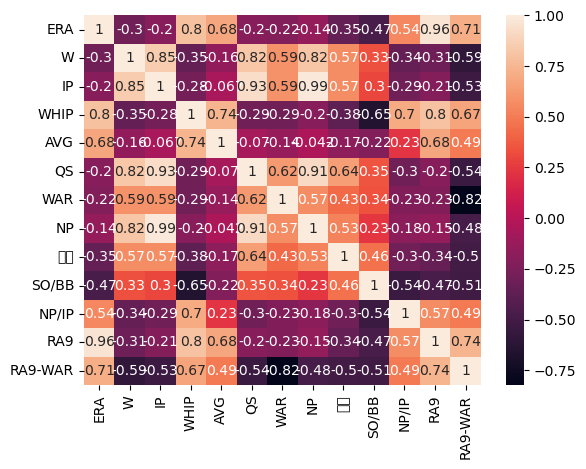

In [80]:
sns.heatmap(df_1_corr, annot = True)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif["features"] = df_1.columns
vif.round(1)

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,161.2,ERA
1,10.4,W
2,591.2,IP
3,450.1,WHIP
4,241.3,AVG
5,14.5,QS
6,inf,WAR
7,500.0,NP
8,3.4,연봉
9,17.6,SO/BB


In [10]:
df_ago = pd.read_csv('./pitcher_salary_current&predict.csv')
df_ago

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,2,3,2,4,1,0,2020,8000.0,1.45,16000.0
1,7,김명신,두산,3.52,16,0,1,0,0,0.000,...,0,2,0,0,0,0,2020,5200.0,0.29,4500.0
2,8,김강률,두산,3.54,30,2,2,0,0,0.500,...,2,0,1,0,0,0,2020,15000.0,-0.37,11000.0
3,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,3,2,4,0,2,1,2020,5900.0,3.46,16000.0
4,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1,7,6,3,4,1,2020,27000.0,2.39,19000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,2,5,7,0,11,0,2023,14000.0,1.64,14000.0
609,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1,4,2,1,3,0,2023,70000.0,0.78,18000.0
610,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1,3,3,2,3,0,2023,3000.0,-0.15,7400.0
611,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1,4,4,0,8,2,2023,3000.0,0.08,4500.0


In [11]:
df_ago.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉'],
      dtype='object')

In [12]:
df_ago_c = df_ago.copy()

In [13]:
df_ago_c = df_ago_c.query('IP > 32')

In [14]:
df_ago_c.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,3B,SAC,SF,IBB,WP,BK,연도,현재연봉,WAR_x,예측연봉
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,...,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,11.587973,4.163541,40.400891,4.614699,4.427617,2.554566,5.307350,0.485755,78.603563,27.226058,...,1.113586,3.657016,2.699332,1.198218,3.443207,0.267261,2021.550111,21646.636971,1.516080,25044.988864
std,6.010923,1.306852,17.391490,3.776201,2.962525,7.118091,7.180639,0.239608,43.358798,43.814986,...,1.183223,2.306426,1.948219,1.375291,2.945488,0.562855,1.125122,45365.778220,1.737802,30867.983045
min,1.000000,1.480000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2700.000000,-1.060000,3000.000000
25%,7.000000,3.270000,26.000000,2.000000,2.000000,0.000000,0.000000,0.333000,47.000000,0.300000,...,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2021.000000,5200.000000,0.280000,8000.000000
50%,11.000000,4.010000,39.000000,4.000000,4.000000,0.000000,2.000000,0.500000,61.000000,0.600000,...,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,2022.000000,10000.000000,0.950000,14000.000000
75%,16.000000,4.980000,56.000000,6.000000,6.000000,1.000000,9.000000,0.625000,104.000000,49.000000,...,2.000000,5.000000,4.000000,2.000000,5.000000,0.000000,2023.000000,22000.000000,2.320000,25200.000000
max,25.000000,10.760000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,6.000000,12.000000,10.000000,8.000000,18.000000,4.000000,2023.000000,810000.000000,8.450000,200000.000000


In [15]:
df_ago_c['K/9'] = (df_ago_c['SO'] / df_ago_c['IP']) * 9

In [16]:
df_ago_c['BB/9'] = (df_ago_c['BB'] / df_ago_c['IP']) * 9
df_ago_c['K-BB'] = df_ago_c['K/9'] - df_ago_c['BB/9']

In [17]:
df_ago_c['QS/G'] = df_ago_c['QS'] / df_ago_c['G']

In [18]:
df_ago_c['HLD/IP'] = df_ago_c['HLD'] / df_ago_c['G']

In [19]:
df_ago_c['IP/G'] = df_ago_c['IP'] / df_ago_c['G']

In [20]:
df_ago_c['FIP'] = ((13 * df_ago_c['HR'] + 3*(df_ago_c['BB'] + df_ago_c['HBP']) -2*df_ago_c['SO']) / df_ago_c['IP']) + 4.305

In [21]:
df_ago_c['SO/NP'] = (df_ago_c['SO']*3)/(df_ago_c['NP'] - (df_ago_c['H'] + df_ago_c['HR']))

In [22]:
df_ago_corr = df_ago_c[['W', 'SV', 'QS', 'IP', 'SO','WHIP', 'WAR_x', 'QS/G', 'IP/G','SO/NP', 'K/9', 'K-BB','예측연봉']].corr()

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

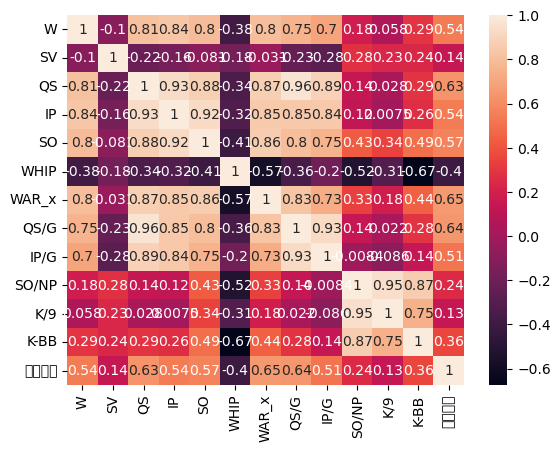

In [23]:
sns.heatmap(df_ago_corr, annot = True)

In [24]:
df_ago_c_k = df_ago_c.query('선수명 == "김태훈"')

In [25]:
df_ago_c_drop = df_ago_c.drop('현재연봉', axis = 1)

In [26]:
df_a_drop = df_ago_c_drop.drop('예측연봉', axis = 1)
df_a_drop.duplicated().sum()

13

In [27]:
df_a_drop = df_a_drop.drop_duplicates()

In [28]:
df_salary_name = df_ago_c[['선수명', '팀명', '연도', '현재연봉', '예측연봉']]

In [29]:
df_salary_pred = pd.merge(df_a_drop, df_salary_name, on = ['선수명', '팀명', '연도'], how = 'left')

In [30]:
df_salary_pred = df_salary_pred.dropna()

In [31]:
df_salary_pred = df_salary_pred.drop_duplicates()

In [32]:
df_salary_pred.duplicated().sum()

0

In [33]:
df_salary_pred.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       'WAR_x', 'K/9', 'BB/9', 'K-BB', 'QS/G', 'HLD/IP', 'IP/G', 'FIP',
       'SO/NP', '현재연봉', '예측연봉'],
      dtype='object')

In [35]:
df_salary_pred[['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       'WAR_x', 'K/9', 'BB/9', 'K-BB', 'QS/G', 'HLD/IP', 'IP/G', 'FIP',
       'SO/NP']].duplicated().sum()

37

In [39]:
df_salary_pred[['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       'WAR_x', 'K/9', 'BB/9', 'K-BB', 'QS/G', 'HLD/IP', 'IP/G', 'FIP',
       'SO/NP']] = df_salary_pred[['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       'WAR_x', 'K/9', 'BB/9', 'K-BB', 'QS/G', 'HLD/IP', 'IP/G', 'FIP',
       'SO/NP']].drop_duplicates()

In [40]:
df_salary_pred[['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       'WAR_x', 'K/9', 'BB/9', 'K-BB', 'QS/G', 'HLD/IP', 'IP/G', 'FIP',
       'SO/NP']].duplicated().sum()

36

In [240]:
df_salary_pred.to_csv('df_pitchers.csv', index = False)

In [41]:
df_p = pd.read_csv('./df_pitcher.csv')
df_p

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,K-BB,BABIP,QS/G,HLD/G,HLD/IP,FIP,IP/G,SO/NP,현재연봉,예측연봉
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,4.056338,-0.432215,0.000000,0.111111,0.111111,15.995141,1.126984,0.170045,8000.0,16000.0
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,4.317073,0.309091,0.095238,0.000000,0.000000,5.386301,2.928571,0.141071,5900.0,16000.0
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,1.295455,0.311659,0.166667,0.000000,0.000000,5.517121,3.142857,0.122714,27000.0,19000.0
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,1.536585,0.309211,0.000000,0.166667,0.166667,5.622073,0.976190,0.100671,21000.0,15600.0
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,5.433962,-0.444762,0.000000,0.000000,0.000000,15.210660,1.827586,0.170401,2900.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,1.187500,-0.475529,0.250000,0.000000,0.000000,18.971667,5.142857,0.109753,14000.0,14000.0
426,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,2.571429,0.347107,0.080000,0.180000,0.180000,5.724048,2.100000,0.118685,70000.0,18000.0
427,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,3.631579,-0.544262,0.000000,0.100000,0.100000,19.340088,1.140000,0.150087,3000.0,7400.0
428,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1.340426,-0.427103,0.058824,0.000000,0.000000,17.517766,2.764706,0.138232,3000.0,4500.0


In [232]:
df_p.isna().sum()

순위        0
선수명       0
팀명        0
ERA       0
G         0
W         0
L         0
SV        0
HLD       0
WPCT      0
IP        0
H         0
HR        0
BB        0
HBP       0
SO        0
R         0
ER        0
WHIP      0
CG        0
SHO       0
QS        0
BSV       0
TBF       0
NP        0
AVG       0
2B        0
3B        0
SAC       0
SF        0
IBB       0
WP        0
BK        0
연도        0
WAR_x     0
K/9       0
BB/9      0
K-BB      0
BABIP     0
QS/G      0
HLD/G     0
HLD/IP    0
FIP       0
IP/G      0
SO/NP     0
현재연봉      0
예측연봉      0
dtype: int64

In [129]:
from scipy.stats import chi2_contingency
result = chi2_contingency(df_ago_c[['ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'WHIP', 'QS',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'WP',
       '현재연봉', 'K/9', 'BB/9', 'QS/G',
       'HLD/G', 'IP/G', '예측연봉']], correction = False)
result

Chi2ContingencyResult(statistic=3011614.175315994, pvalue=0.0, dof=12992, expected_freq=array([[2.21341478e+00, 2.14778537e+01, 2.45325871e+00, ...,
        5.13252124e-02, 1.37632407e+00, 1.33143749e+04],
       [2.14448209e+00, 2.08089659e+01, 2.37685653e+00, ...,
        4.97267841e-02, 1.33346102e+00, 1.28997235e+04],
       [4.22257387e+00, 4.09737140e+01, 4.68012874e+00, ...,
        9.79140931e-02, 2.62563985e+00, 2.54000887e+04],
       ...,
       [1.03291082e+00, 1.00228424e+01, 1.14483624e+00, ...,
        2.39513929e-02, 6.42274568e-01, 6.21327823e+03],
       [7.54401935e-01, 7.32033352e+00, 8.36148349e-01, ...,
        1.74932597e-02, 4.69094880e-01, 4.53796111e+03],
       [1.38713183e+01, 1.34600233e+02, 1.53744037e+01, ...,
        3.21651578e-01, 8.62532835e+00, 8.34402724e+04]]))

20 ~ 23 시즌 평균 FIP : 4.305

In [84]:
df_ago_c.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'K/9', 'BB/9', 'K-BB', 'BABIP', 'QS/G',
       'HLD/G', 'HLD/IP', 'FIP'],
      dtype='object')

In [81]:
target = df_ago_c.drop('예측연봉', axis = 1)

In [169]:
X = df_ago_c[['ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'WHIP', 'QS',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'WP',
       '현재연봉', 'WAR_x', 'K/9', 'BB/9', 'K-BB','QS/G',
       'HLD/G', 'IP/G']].to_numpy()
y = df_ago_c['예측연봉'].to_numpy()

In [170]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

# 학습 데이터와 테스트 데이터로 분리하기

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
ss_x = StandardScaler()
ss_y = StandardScaler()

X_scaled = ss_x.fit_transform(X_train)
y_scaled = ss_y.fit_transform(y_train)
scaled_X = ss_x.transform(X_test)
scaled_y = ss_y.transform(y_test)

In [171]:
X_train.shape

(359, 31)

In [172]:
lr = linear_model.LinearRegression()
model = lr.fit(X_scaled, y_train)

# 회귀 분석 모델을 평가한다.
print(model.score(X_scaled, y_train)) # train R2 score를 출력
print(model.score(scaled_X, y_test))

0.6264593269630665
0.6171352581198793


In [173]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행한다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     18.34
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           2.40e-53
Time:                        16:07:31   Log-Likelihood:                -4063.3
No. Observations:                 359   AIC:                             8189.
Df Residuals:                     328   BIC:                             8309.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.248e+04   3.98e+04      1.572      0.117   -1.57e+04    1.41e+05
x1           304.9346   1816.743      0.168      0.867   -3269.004    3878.873
x2           -79.9388    325.315     -0.246      0.806    -719.906     560.028
x3          1117.5693    761.123      1.468      0.143    -379.730    2614.869
x4          -850.1625    811.229     -1.048      0.295   -2446.031     745.706
x5          1111.3956    236.816      4.693      0.000     645.526    1577.265
x6          1514.5369   1098.334      1.379      0.169    -646.131    3675.205
x7         -1.222e+04   7799.279     -1.567      0.118   -2.76e+04    3120.153
x8         -2345.4830   1236.032     -1.898      0.059   -4777.033      86.067
x9           453.9074    419.779      1.081      0.280    -371.892    1279.706
x10          485.2525    459.841      1.055      0.292    -419.357    1389.862
x11         -769.6079    441.781     -1.742      0.082   -1638.690      99.474
x12          471.7581    546.640      0.863      0.389    -603.604    1547.120
x13          692.7891    216.507      3.200      0.002     266.871    1118.707
x14        -1.146e+05   7.06e+04     -1.624      0.105   -2.54e+05    2.43e+04
x15        -1509.0554   1847.856     -0.817      0.415   -5144.200    2126.089
x16          208.2942    409.432      0.509      0.611    -597.150    1013.739
x17           36.3207     23.028      1.577      0.116      -8.981      81.622
x18         4.074e+05   3.45e+05      1.180      0.239   -2.72e+05    1.09e+06
x19         -149.4211    306.211     -0.488      0.626    -751.807     452.965
x20          957.1690   1092.569      0.876      0.382   -1192.158    3106.496
x21         -297.8880    691.411     -0.431      0.667   -1658.048    1062.272
x22         -316.1881    761.295     -0.415      0.678   -1813.825    1181.449
x23          416.7708    503.880      0.827      0.409    -574.473    1408.014
x24            0.1726      0.026      6.691      0.000       0.122       0.223
x25         4461.5523   2562.343      1.741      0.083    -579.148    9502.252
x26         1192.5122   2747.694      0.434      0.665   -4212.815    6597.839
x27         7622.3657   5009.707      1.522      0.129   -2232.844    1.75e+04
x28        -6429.8535   2549.163     -2.522      0.012   -1.14e+04   -1415.082
x29         1.433e+05   4.31e+04      3.324      0.001    5.85e+04    2.28e+05
x30         -6.87e+04   6.01e+04     -1.142      0.254   -1.87e+05    4.96e+04
x31        -5515.2828   5294.618     -1.042      0.298   -1.59e+04    4900.410
==============================================================================
Omnibus:                      155.972   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.956
Skew:                           1.550   Prob(JB):                         0.00
Ku